In [13]:
import pandas as pd
data = {
    'BRIGHTNESS': [40, 50, 60, 10, 70, 60, 25],
    'SATURATION': [20, 50, 90, 25, 70, 10, 80],
    'CLASS': ['Red', 'Blue', 'Blue', 'Red', 'Blue', 'Red', 'Blue']
}
df = pd.DataFrame(data)
df

,BRIGHTNESS,SATURATION,CLASS
0,40,20,Red
1,50,50,Blue
2,60,90,Blue
3,10,25,Red
4,70,70,Blue
5,60,10,Red
6,25,80,Blue


In [18]:
x = df.drop('CLASS',axis='columns')
y = df.CLASS
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC 

classifier = SVC()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 1]]


Value of k for maximum accuracy: 4
Maximum accuracy: 0.65


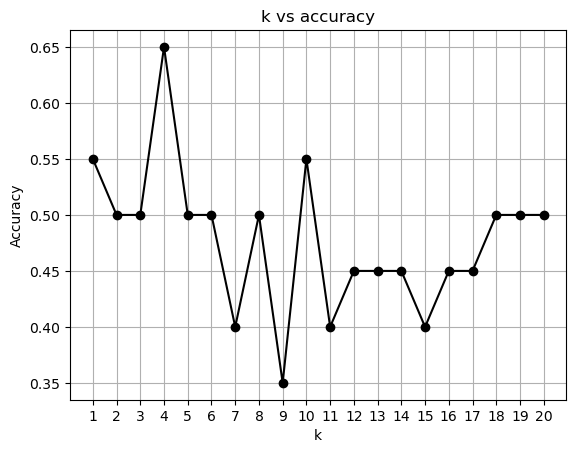

In [25]:
import numpy as np

def knn_classifier(X_train, y_train, X_test, k):
    y_pred = []
    for test_point in X_test:
        
        distances = np.sqrt(np.sum((X_train - test_point)**2, axis=1))
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = y_train[nearest_indices]
        prediction = np.argmax(np.bincount(nearest_labels))
        y_pred.append(prediction)
    return np.array(y_pred)

np.random.seed(0)
X_train = np.random.rand(100, 2) 
y_train = np.random.randint(0, 2, 100)
X_test = np.random.rand(20, 2)
y_test = np.random.randint(0, 2, 20)  

def accuracy_score(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

k_values = range(1, 21) 
accuracies = []
for k in k_values:
    y_pred = knn_classifier(X_train, y_train, X_test, k)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)


best_k = k_values[np.argmax(accuracies)]
max_accuracy = max(accuracies)
print("Value of k for maximum accuracy:", best_k)
print("Maximum accuracy:", max_accuracy)

import matplotlib.pyplot as plt

plt.plot(k_values, accuracies, marker='o',color="black")
plt.title('k vs accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()
